
## Lifecycle of Data Science Projects
1. Data Analysis
1. Feature Engineering
1. Feature Selection
1. Model Building
1. Model Deployment

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import datetime

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('updated_dataset.csv')
df.head()

,report_date,location,data_field,density_per_km,latitude,longitude,cases,incubation_date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2016-03-28,Argentina-Buenos_Aires,cumulative_confirmed_imported_cases,12625.800781,-34.603684,-58.381559,2.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
1,2016-03-28,Argentina-Buenos_Aires,cumulative_probable_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
2,2016-03-28,Argentina-Buenos_Aires,cumulative_probable_imported_cases,12625.800781,-34.603684,-58.381559,1.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
3,2016-03-28,Argentina-Buenos_Aires,cumulative_confirmed_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
4,2016-04-02,Argentina-Buenos_Aires,cumulative_probable_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-26,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18


# 

## Data Analysis

In [3]:
# Rows and columns
df.shape

(174103, 27)

In [5]:
df.columns

Index(['report_date', 'location', 'data_field', 'density_per_km', 'latitude',
       'longitude', 'cases', 'incubation_date', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174103 entries, 0 to 174102
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   report_date        174103 non-null  object 
 1   location           174103 non-null  object 
 2   data_field         174103 non-null  object 
 3   density_per_km     174103 non-null  float64
 4   latitude           174103 non-null  float64
 5   longitude          174103 non-null  float64
 6   cases              174103 non-null  float64
 7   incubation_date    174103 non-null  object 
 8   maxtempC           174103 non-null  int64  
 9   mintempC           174103 non-null  int64  
 10  totalSnow_cm       174103 non-null  float64
 11  sunHour            174103 non-null  float64
 12  uvIndex            174103 non-null  int64  
 13  moon_illumination  174103 non-null  int64  
 14  DewPointC          174103 non-null  int64  
 15  FeelsLikeC         174103 non-null  int64  
 16  He

In [7]:
# Statistical summary
df.describe()

,density_per_km,latitude,longitude,cases,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.00000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000,174103.000000
mean,1137.953228,8.729399,-74.684193,67.840457,27.401607,17.467562,0.009197,11.156092,5.442049,44.953924,16.223345,22.935797,23.106575,21.65309,10.253138,32.881771,74.155305,7.079227,1013.559249,27.401607,8.912402,160.324015,6.841548
std,3015.233172,11.991388,8.289288,1017.345691,6.231908,6.236896,0.278429,1.547238,1.334858,31.400665,5.690392,7.119708,6.862987,5.98353,6.844328,20.014210,12.185643,11.569177,3.012500,6.231908,1.330643,65.931080,4.759012
min,0.002930,-54.805400,-120.740139,0.000000,-19.000000,-31.000000,0.000000,1.900000,1.000000,0.000000,-27.000000,-30.000000,-20.000000,-30.00000,1.000000,0.000000,7.000000,0.000000,977.000000,-19.000000,0.000000,3.000000,1.000000
25%,26.962868,4.255066,-75.978781,0.000000,24.000000,13.000000,0.000000,10.900000,5.000000,17.000000,12.000000,18.000000,18.000000,18.00000,6.000000,18.000000,68.000000,0.400000,1012.000000,24.000000,8.000000,113.000000,4.000000
50%,83.812943,6.643708,-74.069780,0.000000,29.000000,18.000000,0.000000,11.600000,6.000000,44.000000,17.000000,24.000000,24.000000,23.00000,8.000000,29.000000,75.000000,2.600000,1013.000000,29.000000,9.000000,154.000000,5.000000
75%,368.640381,18.338096,-71.339827,5.000000,32.000000,23.000000,0.000000,11.600000,6.000000,70.000000,21.000000,29.000000,29.000000,26.00000,12.000000,46.000000,82.000000,8.800000,1015.000000,32.000000,10.000000,207.000000,8.000000
max,24970.132812,47.751074,-36.781951,46427.000000,48.000000,36.000000,38.400000,17.400000,10.000000,100.000000,26.000000,41.000000,41.000000,40.00000,92.000000,100.000000,100.000000,341.200000,1045.000000,48.000000,10.000000,353.000000,60.000000


In [7]:
# check missing values
df.isnull().sum()

report_date          0
location             0
data_field           0
density_per_km       0
latitude             0
longitude            0
cases                0
incubation_date      0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

In [9]:
df.maxtempC.unique()

array([ 24,  22,  20,  19,  14,  12,  11,   8,  10,  15,  16,  25,  23,
        27,  29,  31,  34,  26,  36,  32,  17,  13,  28,  21,   9,  18,
        33,  30,  37,  35,   7,   6,  38,  42,   3,   4,   5,   2,  -1,
         1,  39,  43,  41,  40,  44,  45,  -4,  -2, -12,  -5,   0, -15,
        -8,  46,  -7,  -9, -14,  -3,  48,  -6, -19, -16, -10, -17, -11,
       -13], dtype=int64)

In [10]:
df.mintempC.unique()

array([  7,  10,  18,  12,   9,   6,   4,   3,  11,   5,   0,   2,  -2,
        19,  14,  15,  22,  17,  13,   1,  -3,   8,  20,  21,  16,  26,
        24,  25,  -1,  23,  -4,  29,  27,  -5,  28,  -6, -12, -10, -16,
       -18, -13,  -7,  -8, -22,  30,  31,  32,  33, -14, -15, -19, -11,
        36,  34,  35, -17,  -9, -25, -21, -20, -23, -28, -31], dtype=int64)

In [11]:
df.totalSnow_cm.unique()

array([ 0. ,  1.2,  0.9,  4.3,  1.1,  0.5,  0.7,  4.8,  1. ,  3.2,  0.4,
        7.1,  3. ,  0.6, 12.5,  5.4,  8.4,  9.2,  0.1,  4. ,  3.1,  1.3,
        3.9,  0.2, 12.7,  3.8,  2.4,  6.2,  0.3,  2. ,  5.2,  2.9,  1.4,
        1.9, 22.4,  3.7, 16.6,  8.2,  1.6,  2.2,  2.7,  9.9,  8.5,  1.8,
        8. ,  2.1,  3.3,  4.5,  7.7, 11.3, 13.3,  5.3, 38.4,  0.8,  3.6,
        2.3,  8.8, 17.9,  8.9, 10.6,  2.5,  7.2,  4.2,  3.4,  7.5, 32.7])

In [12]:
df.sunHour.unique()

array([11.6, 11.5,  8.6, 10.1, 10.9, 10.7,  6.9,  3.8,  5.4,  3.6,  8.7,
        5.2, 10. ,  5.3, 10.8,  5.6,  5.9, 10.3,  9.1, 13.9, 14. , 14.2,
       14.5, 13.4,  7.8, 11.3, 11. , 11.1, 10.5, 10.4, 10.2,  6.8,  8.4,
        5.1,  5. ,  9.8,  4.9,  9.7,  9.6,  9.9,  9. ,  6.6, 14.1,  7.2,
        6.7,  6.5,  8.3,  9.4, 13.5,  7. ,  6. ,  5.5,  8.5, 11.2, 12.5,
        8.1, 13.1, 13.3, 13.7, 12.1, 13.8,  3.9,  7.3,  5.8,  8.8,  4.8,
        4. ,  2. ,  1.9,  7.4,  9.3, 12.4, 11.9, 16.6, 15.1, 12.8, 17.4,
       12.3,  6.2,  5.7,  4.7,  8.9, 10.6, 15.8, 16. , 14.7, 14.8, 16.2,
       16.1,  9.5,  8.2, 15.6, 15.5, 15.7, 14.6,  7.7,  6.4,  9.2,  7.9,
        7.1, 14.4, 13.6, 11.4, 12.9, 12.7, 12.6,  7.5,  4.2,  4.1, 13. ,
       11.8,  6.1, 12. , 11.7, 12.2,  6.3,  7.6,  8. ,  4.3, 13.2,  3.7,
        3.4,  3.5, 14.9, 14.3, 15.9, 15.2, 15. ,  3.3,  2.1, 15.3])

In [13]:
df.uvIndex.unique()

array([ 5,  4,  3,  2,  6,  7,  1,  8,  9, 10], dtype=int64)

In [14]:
df.moon_illumination.unique()

array([ 87,  76,  26,  11,  56, 100,  30,   0,  58,  84,  33,   3,  41,
        54,   8,  28,  79,  70,  15,  24,  75,  74,  23,  21,  82,  50,
        60,  89,  36,  38,  20,  49,  99,  48,   5,  55,  43,  46,  40,
        65,  22,  71,  34,  64,  83,  14,  73,  19,   7,  29,  44,  95,
        62,   4,  94,  69,  16,  85,   2,  17,  53,  68,  81,  45,   6,
        59,  97,  35,   9,  63,  86,   1,  92,  57,  31,  61,  47,  98,
        51,  39,  88,  96,  80,  18,  66,  52,  25,  78,  32,  42,  12,
        91,  37,  77,  90,  13,  67,  27,  72,  10,  93], dtype=int64)

In [15]:
df.DewPointC.unique()

array([  6,  10,  15,  11,   7,   3,   5,   8,   4,  -2,   2,   1,  -1,
         9,   0,  19,  16,  -4,  -9,  -3,  -5,  -8, -11,  12,  13,  14,
        17,  -7,  22,  21,  18,  20,  23,  24,  -6,  25,  26, -10, -12,
       -16, -14, -20, -13, -19, -17, -27, -22, -21, -15, -18], dtype=int64)

In [16]:
df.humidity.unique()

array([ 59,  72,  78,  77,  70,  58,  75,  91,  93,  65,  85,  88,  87,
        76,  92,  71,  80,  73,  66,  68,  81,  51,  55,  47,  25,  50,
        45,  28,  43,  46,  69,  54,  74,  64,  62,  79,  29,  49,  82,
        22,  57,  44,  61,  37,  30,  42,  34,  36,  48,  41,  13,  32,
        26,  40,  39,  56,  38,  53,  24,  89,  86,  63,  67,  83,  60,
        52,  35,  33,  90,  27,  21,  20,  16,  19,  84,  96,  97,  98,
        17,  18,  31,  94,  95,  12,  99,  23,  14,  15,   7,  10,   8,
        11,   9, 100], dtype=int64)

In [17]:
df.precipMM.unique()

array([0.000e+00, 3.310e+01, 2.200e+00, 3.000e-01, 4.000e-01, 2.500e+00,
       1.460e+01, 7.000e-01, 1.000e-01, 2.000e-01, 5.000e-01, 3.800e+00,
       3.900e+00, 1.220e+01, 5.400e+00, 2.600e+00, 1.040e+01, 8.000e-01,
       1.400e+00, 2.900e+00, 1.100e+00, 6.000e-01, 8.100e+00, 6.800e+00,
       2.300e+00, 2.330e+01, 9.000e-01, 4.900e+00, 1.090e+01, 2.700e+01,
       4.300e+00, 2.760e+01, 1.500e+00, 1.240e+01, 3.100e+00, 1.700e+00,
       3.300e+00, 4.500e+00, 1.200e+00, 7.000e+00, 1.800e+00, 5.200e+00,
       2.720e+01, 1.600e+00, 3.330e+01, 7.600e+00, 2.590e+01, 3.700e+00,
       6.180e+01, 1.490e+01, 2.170e+01, 1.000e+01, 5.610e+01, 1.140e+01,
       2.210e+01, 8.700e+00, 2.810e+01, 7.100e+00, 2.400e+00, 1.300e+00,
       2.800e+00, 7.900e+00, 9.600e+00, 1.160e+01, 6.700e+00, 2.850e+01,
       6.200e+00, 1.760e+01, 1.950e+01, 1.260e+01, 6.100e+00, 1.000e+00,
       5.500e+00, 2.100e+00, 1.470e+01, 2.260e+01, 4.200e+00, 5.600e+00,
       1.770e+01, 3.600e+00, 5.300e+00, 7.200e+00, 

In [18]:
df.pressure.unique()

array([1018, 1025, 1015, 1019, 1017, 1026, 1016, 1007, 1013, 1028, 1027,
       1023, 1021, 1020, 1012, 1024, 1031, 1003, 1011, 1006,  999, 1010,
       1009, 1014, 1029, 1008, 1005, 1022, 1032, 1004, 1030, 1001, 1002,
        997,  996, 1000,  987,  992,  977,  991,  998,  993,  985,  984,
        989,  982,  995,  994, 1036, 1038, 1033, 1034, 1039, 1037, 1035,
       1040,  986, 1044, 1042, 1045], dtype=int64)

In [19]:
df.tempC.unique()

array([ 24,  22,  20,  19,  14,  12,  11,   8,  10,  15,  16,  25,  23,
        27,  29,  31,  34,  26,  36,  32,  17,  13,  28,  21,   9,  18,
        33,  30,  37,  35,   7,   6,  38,  42,   3,   4,   5,   2,  -1,
         1,  39,  43,  41,  40,  44,  45,  -4,  -2, -12,  -5,   0, -15,
        -8,  46,  -7,  -9, -14,  -3,  48,  -6, -19, -16, -10, -17, -11,
       -13], dtype=int64)

In [20]:
df.visibility.unique()

array([10,  8,  5,  6,  9,  7,  4,  3,  0,  2,  1], dtype=int64)

In [21]:
df.winddirDegree.unique()

array([189,  99, 105, 166, 208,  54, 222,  80, 162, 153, 136, 291, 241,
       173, 190, 133, 331, 203, 253, 152, 287, 271, 280, 146, 135, 220,
       195, 185,  50, 126, 165, 294, 246, 227, 154, 250, 235, 172, 177,
       214,  94, 234, 277, 262,  36,  58, 282, 120, 266, 251, 305,  81,
       100, 163, 157, 159,  31, 117, 142, 161, 150, 197,  90, 156, 155,
       151,  75, 119, 144, 132, 106, 209, 160,  43, 169, 174, 137,  83,
       158, 121, 143, 148, 164,  73,  67,  76,  92, 113, 114,  88,  62,
        45,  65, 212,  82, 170, 139,  64, 102, 104,  79, 101,  71,  55,
        85,  70,  84,  91, 124, 183, 122,  49,  87,  63, 302,  16, 110,
       130, 221, 261, 324,  23, 304, 127, 290, 254, 297, 285, 292,  66,
       213, 184, 206, 226, 111, 194, 274, 186, 243, 260, 112, 192, 267,
       269, 196,  86, 299, 339, 289, 171,  44,  95,  48,  98, 123,  97,
       249, 107, 229, 283, 217,  52, 178, 264, 230,  24, 125, 247, 242,
       238, 131, 265,  78, 116, 258, 240, 134, 306,  69,  47,  5

In [22]:
df.windspeedKmph.unique()

array([10, 18, 11, 21, 15, 14, 13,  7, 28, 20, 16, 24, 12, 40, 19, 22, 25,
        9, 31, 23,  8, 17,  6,  5,  3,  4, 30, 37, 35, 43, 26, 41, 34, 44,
       32, 36, 27, 29, 33, 49, 50,  2, 38, 39, 42, 60, 56, 45, 46,  1, 47],
      dtype=int64)

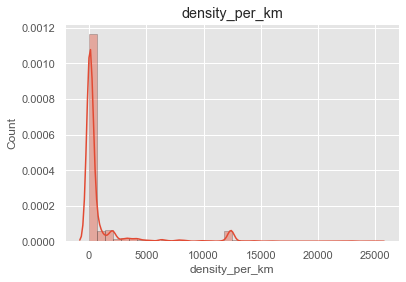

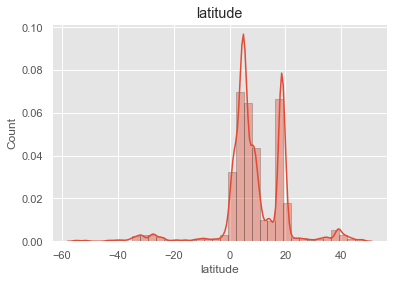

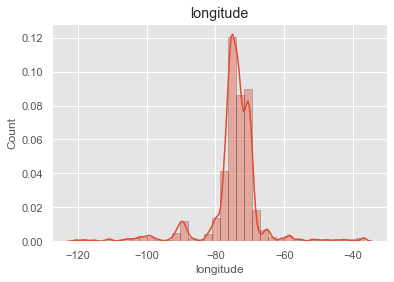

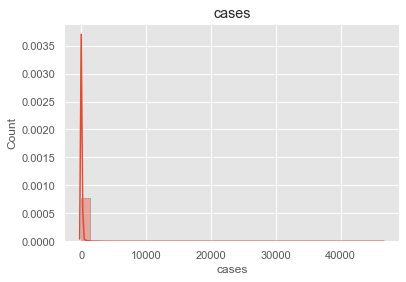

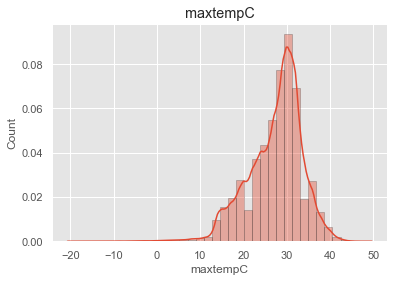

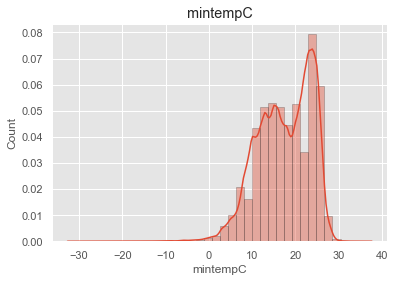

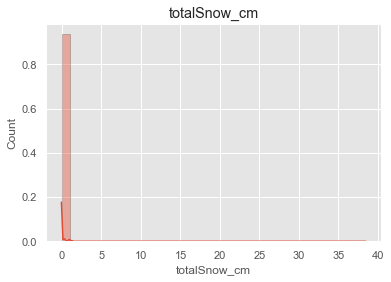

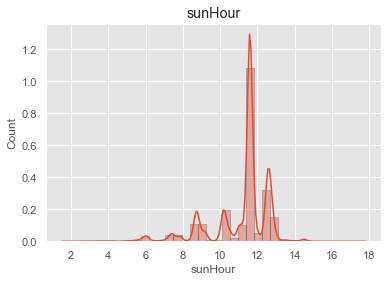

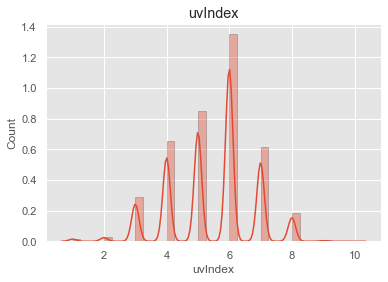

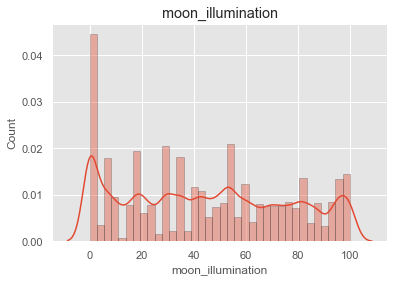

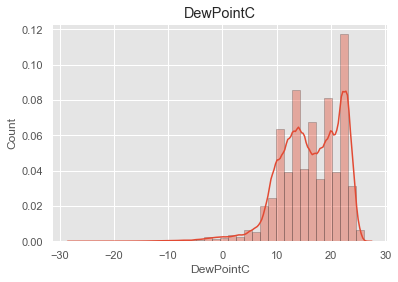

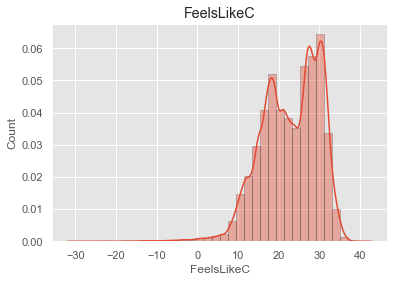

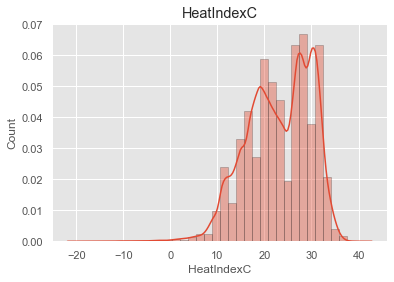

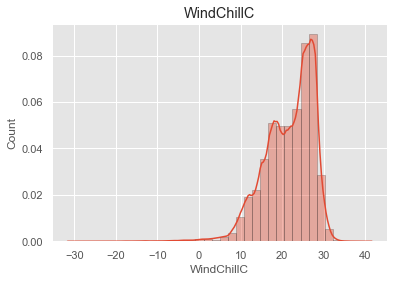

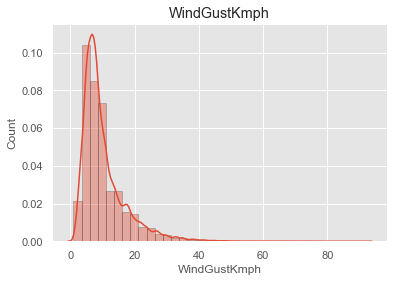

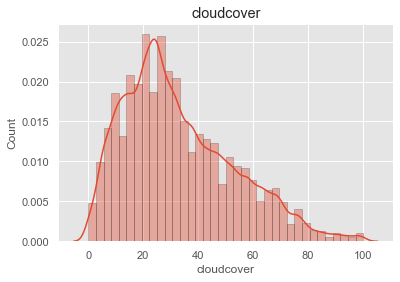

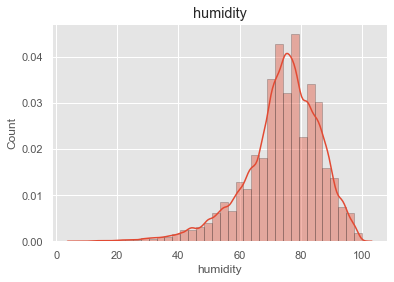

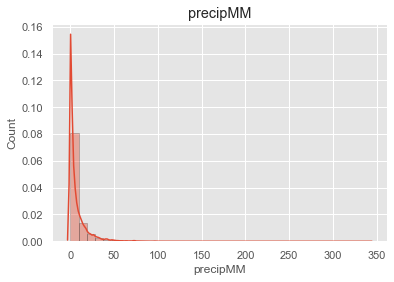

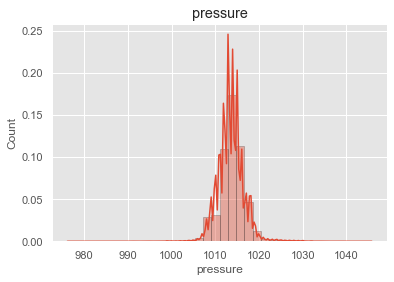

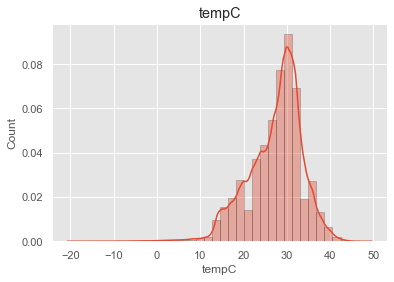

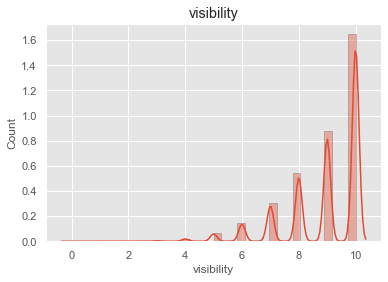

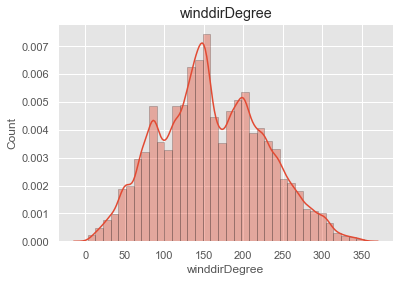

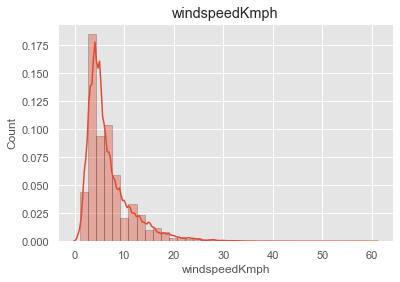

In [8]:
# continuous features
continuous_feature = ['density_per_km', 'latitude','longitude', 'cases', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph']

# visualize distribution of the data using kernal density plot
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(data[feature], hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'})
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


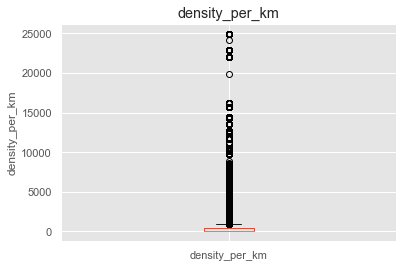

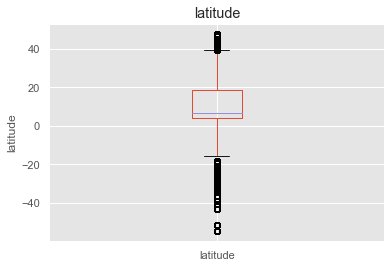

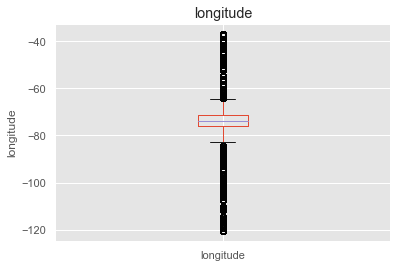

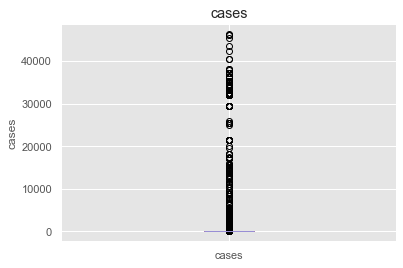

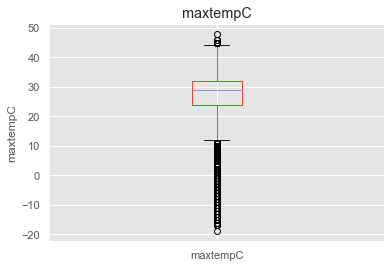

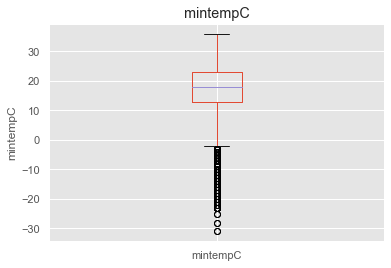

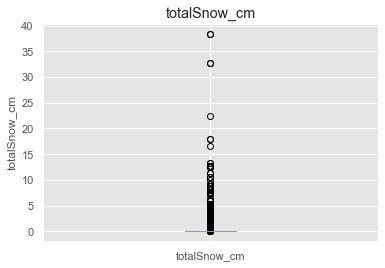

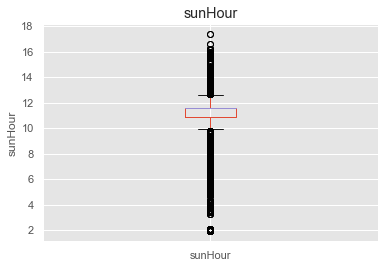

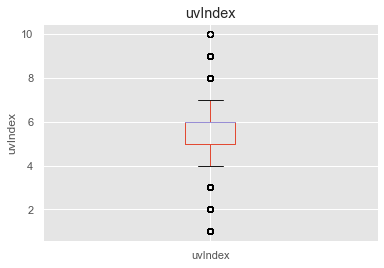

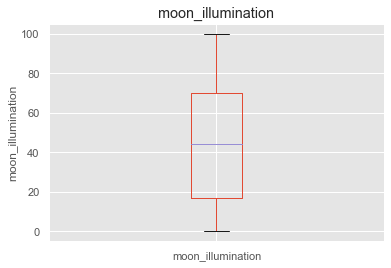

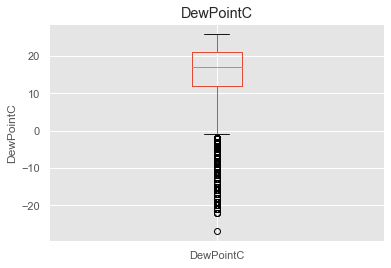

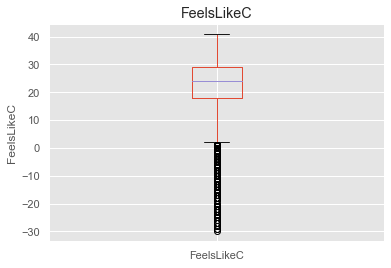

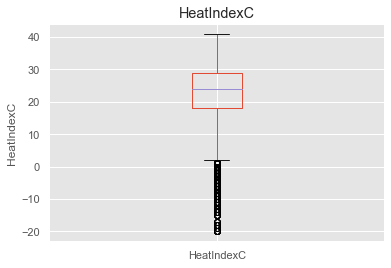

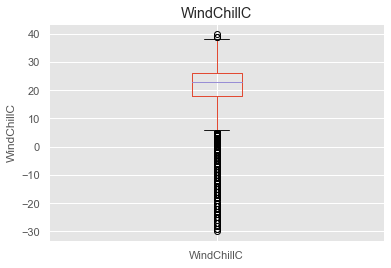

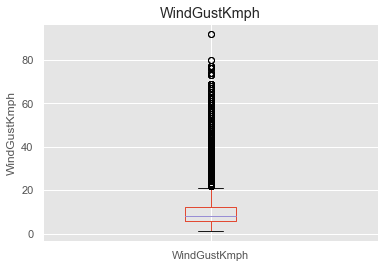

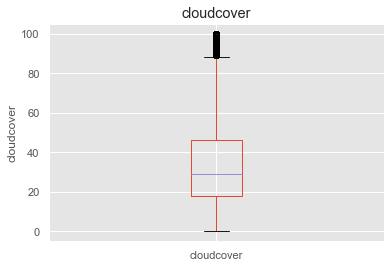

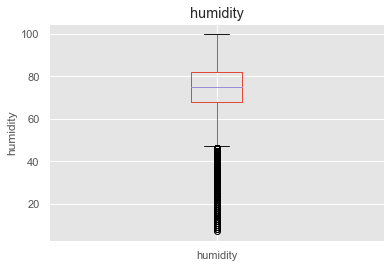

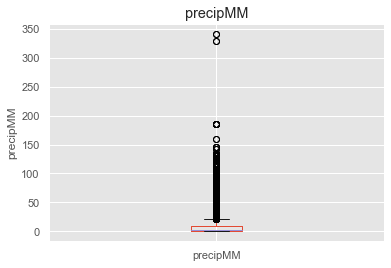

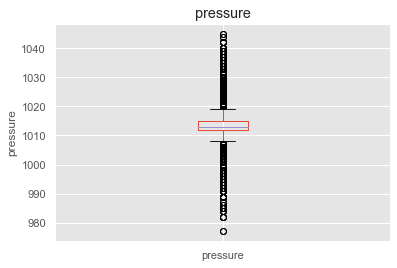

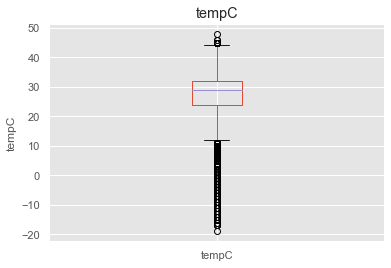

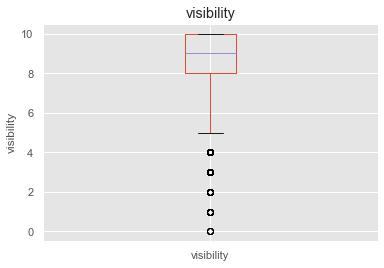

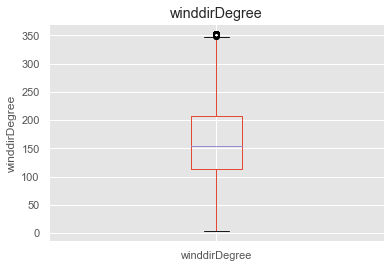

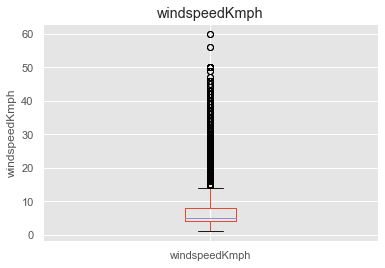

In [9]:
# Outlier Detection
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

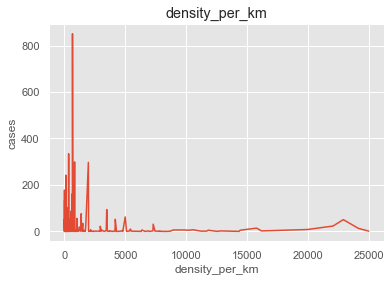

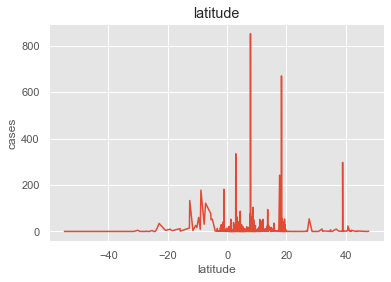

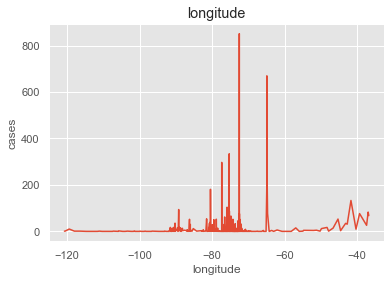

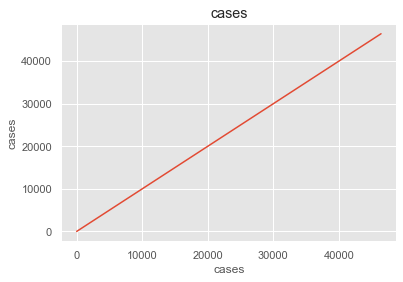

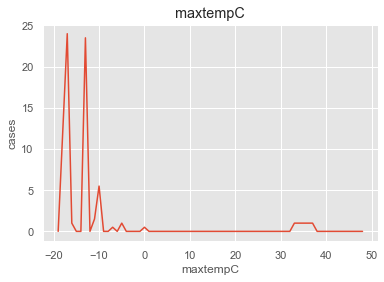

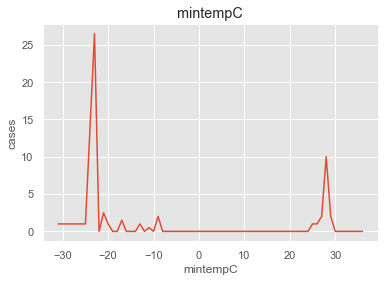

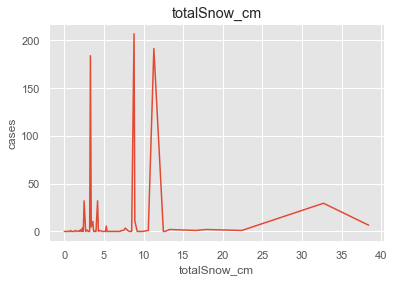

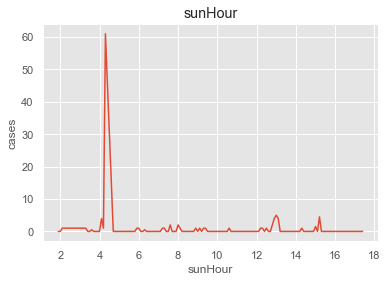

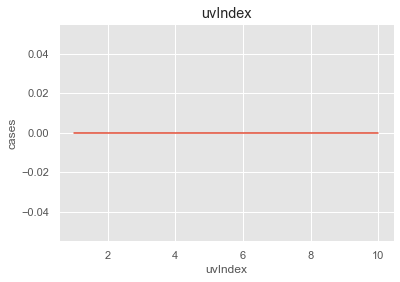

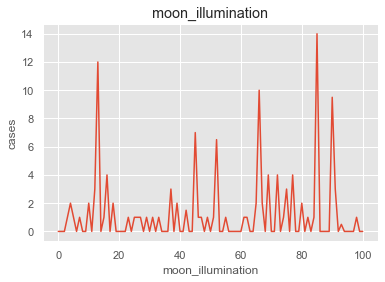

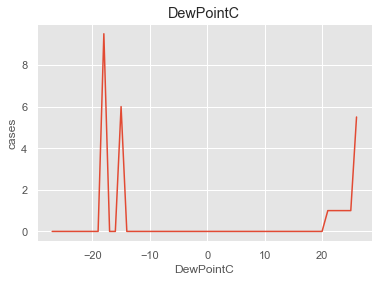

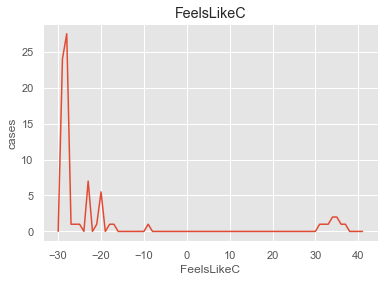

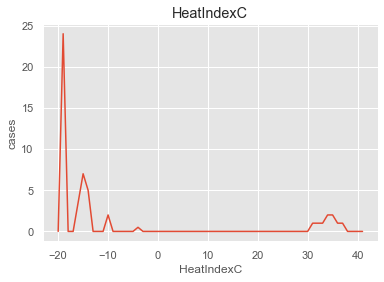

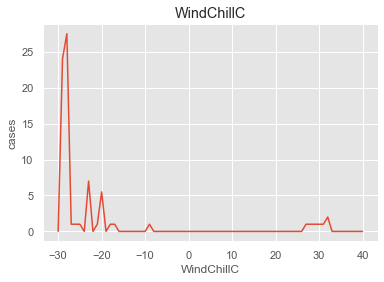

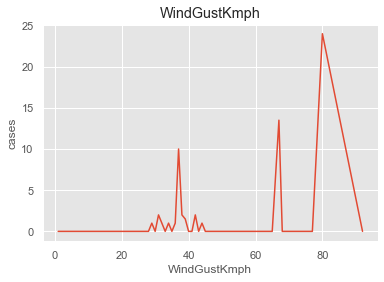

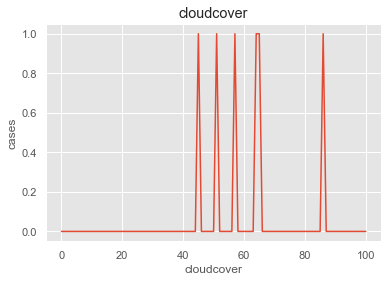

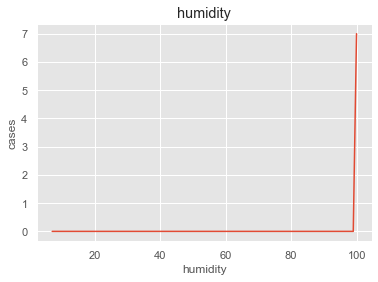

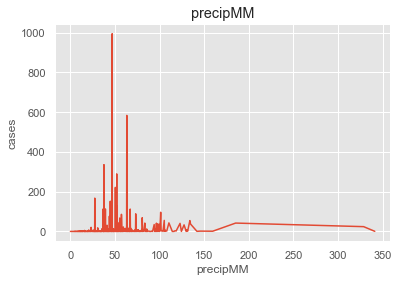

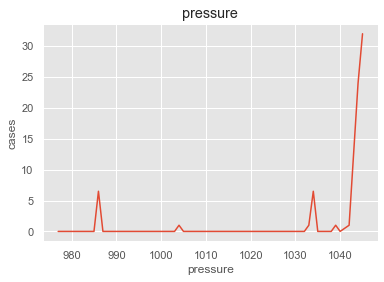

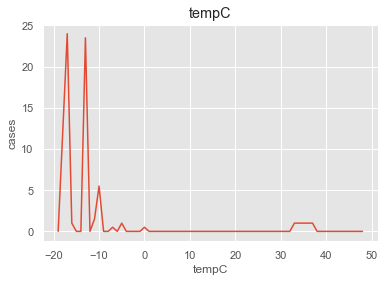

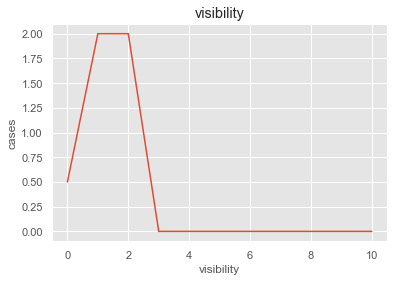

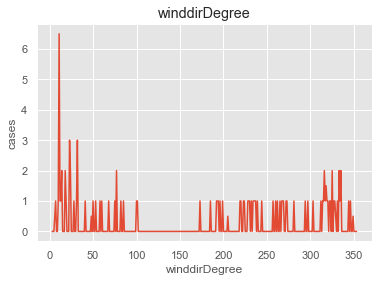

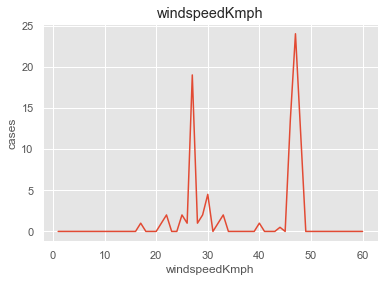

In [25]:
## Find out the relationship between independent feature and dependent feature cases
for feature in continuous_feature:
    data=df.copy()
    data.groupby(feature)['cases'].median().plot.line()
    plt.xlabel(feature)
    plt.ylabel('cases')
    plt.title(feature)
    plt.show()

# 

## Feature Engineering

In [11]:
df.head()

,report_date,location,data_field,density_per_km,latitude,longitude,cases,incubation_date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2016-03-28,Argentina-Buenos_Aires,cumulative_confirmed_imported_cases,12625.800781,-34.603684,-58.381559,2.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
1,2016-03-28,Argentina-Buenos_Aires,cumulative_probable_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
2,2016-03-28,Argentina-Buenos_Aires,cumulative_probable_imported_cases,12625.800781,-34.603684,-58.381559,1.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
3,2016-03-28,Argentina-Buenos_Aires,cumulative_confirmed_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-21,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10
4,2016-04-02,Argentina-Buenos_Aires,cumulative_probable_local_cases,12625.800781,-34.603684,-58.381559,0.0,2016-03-26,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18


In [12]:
# Convert our incubation_date columns to datetime datatype
df['incubation_date'] = pd.to_datetime(df['incubation_date'], format="%Y-%m-%d")

# create new year and month column from datetime
df['year'] = pd.DatetimeIndex(df['incubation_date']).year
df['month'] = pd.DatetimeIndex(df['incubation_date']).month

In [13]:
# Target 0 No zika
# Target 1 Zika
df['Target'] = [0 if x == 0 else 1 for x in df['cases']]

In [14]:
# Total no of duplicate rows
df.duplicated().sum()

18880

In [15]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [16]:
# Remove unnecessary columns
df = df.drop(['report_date','incubation_date','location','data_field','cases'], axis = 1)

In [17]:
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,3,0


In [18]:
len(df.columns)

25

In [22]:
df.to_csv('classification_dataset.csv', index=False )